In [1]:
%matplotlib inline
#matplotlib notebook
#%pdb

#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import sys
import scipy.io as sio
import scipy.stats as stats
import scipy.signal as signal
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
import time
import math
import ipywidgets
import PIL
#import itertools
import os
from numpy.lib.format import open_memmap
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm_notebook
#from numba import jit

#import cv2

#from ipywidgets import FloatProgress
from IPython.display import display

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from keras.models import Sequential, load_model
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten, Concatenate
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Lambda
import keras.optimizers as optimizers
from keras import regularizers
from keras import backend as K
from keras.models import Model

Using TensorFlow backend.


In [3]:
#from build_dataset import roi_unet_test as dataset
from build_dataset import test_data_generator
from build_model import load_model_weights, load_saved_model

In [4]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.log_device_placement = True
sess = tf.Session(config=config)
#K.set_session(sess)

In [6]:
weights_filename = 'ROI_detection_unet_20190416-151650_best_weight.weight'
model = load_saved_model(weights_filename)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Save time:
	Model: 2019/05/05 00:14:35


model_folder = 'ROI_detection_unet_20170808-185834'
model_filename = 'ROI_detection_unet_20170808-185834_20170809_131239_99.keras'
model = load_model('X:\Hua-an\Data\Deep_Learning_Model\%s\%s.keras' % (model_folder,model_folder))

In [7]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
gaussian_noise_1 (GaussianNoise (None, 32, 32, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   640         gaussian_noise_1[0][0]           
__________________________________________________________________________________________________
p_re_lu_1 (PReLU)               (None, 32, 32, 64)   65536       conv2d_1[0][0]                   
____________________________________________________________________________________________

In [ ]:
#test_dataset_folder = ["C:\\Users\\Hua-an\\Documents\\CloudStation\\Lab_Project\\Ultrasound\\Analysis\\max-min_image\\control_hippocampus\\New folder"]

In [8]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)


False

In [8]:
test_dataset_folder = ["/home/dana_z/ssd_2TB/from_Hua-an"]

In [9]:
params = {'model': model,
          'stride_ratio': 0.5,
          'flip': False,
          'rotate': False,
          'std_normalization': True,
         }
test_generator = test_data_generator(test_dataset_folder, **params)



Files: 100%|██████████| 6/6 [00:00<00:00, 160.61it/s]

Total 3844 samples.


In [10]:
test_generator.predict()

Predicting: 100%|██████████| 3844/3844 [01:19<00:00, 48.20it/s]


In [12]:
test_generator.create_roi(roi_threshold=0.5, roi_size_limit=[50, 500], erosion_iter=1, watershed=True)

Creating ROI: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


In [13]:
test_generator.save_predict_roi()

Saving ROI: 100%|██████████| 1/1 [00:00<00:00, 65.35it/s]


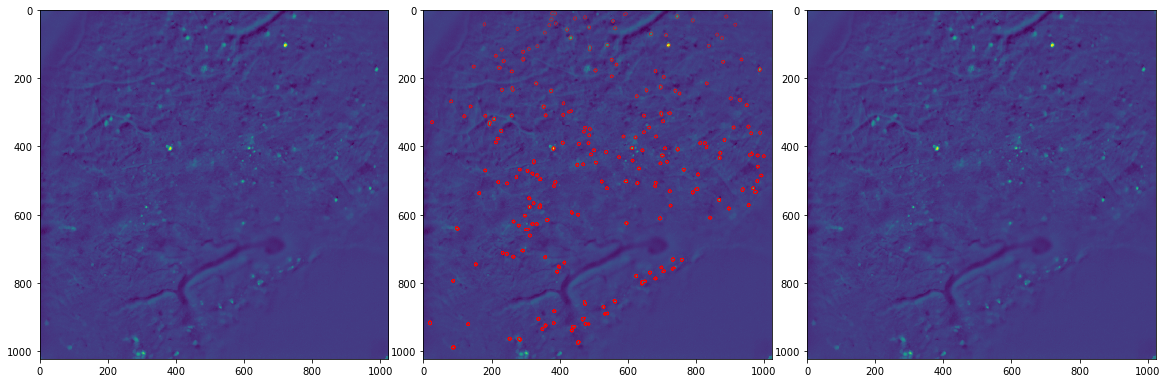

In [14]:
test_generator.show_predict_roi(file_idx=0,area_idx=None, colors='red',linewidths=0.5)

In [ ]:
test_generator.show_predict_roi(file_idx=1,area_idx=None, colors='red',linewidths=0.5)

In [ ]:
test_generator.show_predict_roi(file_idx=1,area_idx=[[600,800],[400,600]], colors='red',linewidths=0.5)

In [ ]:
test_generator.show_predict_roi(file_idx=1,area_idx=[[600,800],[900,1100]], colors='red',linewidths=0.5)

In [ ]:
test_generator.show_predict_roi(file_idx=2,area_idx=[[600,800],[200,400]], colors='red',linewidths=0.5)

In [ ]:
test_generator.show_predict_roi(file_idx=3,area_idx=None, colors='red',linewidths=0.5)

In [ ]:
test_generator.show_predict_roi(file_idx=4,area_idx=None, colors='red',linewidths=0.5)

In [ ]:
test_generator.show_predict_roi(file_idx=5,area_idx=None, colors='red',linewidths=0.5)